# Usage example

This notebook aims at providing some example code on how to use the python package CarbonAImpact.
This package allows you to monitor the energy consumption and CO2 footprint of any sample of code or function

[TOC]

In all this notebook we'll try to measure how much CO2 does the training of a toy algorithm on the mnist database emit
```python
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
clf = SGDClassifier(loss='log', alpha=1e-5)
cv = StratifiedKFold(10, random_state=0, shuffle=True)
cv_results = cross_validate(clf, X, y, cv=cv)
print(cv_results['test_score'].mean(), cv_results['test_score'].std())
```

In [20]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np

In [21]:
X, y = datasets.load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

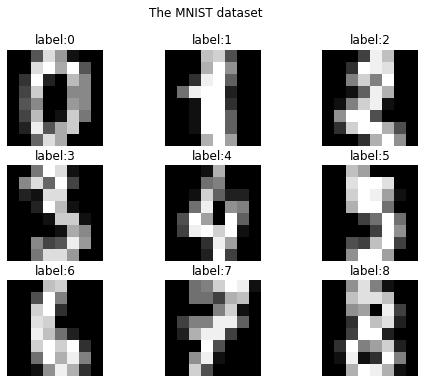

In [22]:
plt.figure(figsize=(8,6))
plt.style.use('fast')
plt.suptitle('The MNIST dataset')
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i].reshape((8,8)), cmap='gray')
    plt.title(f'label:{y[i]}')
    plt.axis('off')

In [23]:
from CarbonAImpact import PowerMeter

In [9]:
help(PowerMeter)

Help on class PowerMeter in module CarbonAImpact.PowerMeter:

class PowerMeter(builtins.object)
 |  PowerMeter(project_name='', program_name='', client_name='', cpu_power_log_path='', get_country=True, user_name='', filepath=None, api_endpoint=None, location='', is_online=True, output_format='csv')
 |  
 |  PowerMeter is a general tool to monitor and log the power consumption of any given function.
 |  
 |  Parameters
 |  ----------
 |  - project_name (optional) : str
 |      Name of the project you are working on (default is folder_name)
 |  - cpu_power_log_path (optional) : str
 |      The path to the tool "PowerLog"
 |  - get_country (optional) : bool
 |      Whether use user country location or not
 |  - user_name (optional) : str
 |      The name of the user using the tool (for logging purpose)
 |  - filepath (optional) : str
 |      Path of the file where all the green ai logs are written
 |  - api_endpoint (optional):
 |      Endpoint of the API
 |  
 |  Methods defined here:
 |

In [10]:
# imports
from CarbonAImpact import PowerMeter #Our package

In [17]:
# Creates a power meter object that contains information relative to the current project
# You need to do this step no matter how you use the package
power_meter = PowerMeter(project_name="example", program_name="CarbonAImpact", client_name="IDE", is_online=False, location="FR")

In [24]:
# Creates a power meter object that contains information relative to the current project
# You need to do this step no matter how you use the package
power_meter = PowerMeter.from_config(path="config.json")

## Function decorator

In [25]:
# Add a decorator to the main function to measure power usage of this function each time it is called
@power_meter.measure_power(
  package="sklearn",
  algorithm="SGDClassifier",
  data_type="tabular/images",
  data_shape="(1797, 64)",
  algorithm_params="loss='log', alpha=1e-5",
  comments="10 fold cross validated training of logistic regression classifier trained on the MNIST dataset"
)
def cross_val_mnist(alpha, random_state=0):
    # load data
    mnist = datasets.load_digits()
    X = mnist.data
    y = mnist.target
    # Classifier
    clf = SGDClassifier(loss='log', alpha=alpha, random_state=random_state)
    # Cross val
    cv = StratifiedKFold(10, random_state=random_state, shuffle=True)
    cv_results = cross_validate(clf, X, y, cv=cv)
    # print results
    print(cv_results['test_score'].mean(), cv_results['test_score'].std())
    return cv_results

In [26]:
train_results = cross_val_mnist(1e-5)

0.9565983860955928 0.013556136197153262


In [27]:
train_results

{'fit_time': array([0.08896303, 0.09973907, 0.08305478, 0.076756  , 0.05948997,
        0.161412  , 0.085356  , 0.09787393, 0.21534991, 0.33084011]),
 'score_time': array([0.01409101, 0.00173497, 0.00052214, 0.00040293, 0.00056911,
        0.00059128, 0.00044417, 0.00049591, 0.00072002, 0.00067902]),
 'test_score': array([0.95555556, 0.96666667, 0.96666667, 0.95      , 0.94444444,
        0.92777778, 0.97777778, 0.96648045, 0.96089385, 0.94972067])}

## Using the with statement

In [26]:
with power_meter(
  package="sklearn",
  algorithm="SGDClassifier",
  data_type="tabular/images",
  data_shape="(1797, 64)",
  algorithm_params="loss='log', alpha=1e-5",
  comments="10 fold cross validated training of logistic regression classifier trained on the MNIST dataset"
):
    mnist = datasets.load_digits()
    X = mnist.data
    y = mnist.target
    clf = SGDClassifier(loss='log', alpha=1e-5, random_state=0)
    cv = StratifiedKFold(10, random_state=0, shuffle=True)
    cv_results = cross_validate(clf, X, y, cv=cv)
    print(cv_results['test_score'].mean(), cv_results['test_score'].std())

0.9565983860955928 0.013556136197153262


## Magic function
Only usable in notebooks

In [23]:
# import the magic function module
%load_ext CarbonAImpact.MagicPowerMeter

The CarbonAImpact.MagicPowerMeter extension is already loaded. To reload it, use:
  %reload_ext CarbonAImpact.MagicPowerMeter


In [24]:
%%measure_power?

Docstring:
::

  %measure_power [--data_type DATA_TYPE] [--data_shape DATA_SHAPE]
                     [--algorithm_params ALGORITHM_PARAMS]
                     [--comments COMMENTS]
                     power_meter package algorithm

positional arguments:
  power_meter           The PowerMeter object of this project
  package               The name of the package used here
  algorithm             The algorithm type used here

optional arguments:
  --data_type DATA_TYPE
                        Type of data used
  --data_shape DATA_SHAPE
                        Size of the data used
  --algorithm_params ALGORITHM_PARAMS
                        Some informative parameters used in your algorithm
  --comments COMMENTS   Comments to describe what is done
File:      /usr/local/anaconda3/envs/green_ai/lib/python3.7/site-packages/CarbonAImpact/MagicPowerMeter.py


In [25]:
%%measure_power power_meter "sklearn" "SGDClassifier" --data_type "tabular/images" --data_shape "(1797,64)" --algorithm_params "loss='log', alpha=1e-5" --comments "10 fold cross validated training of logistic regression classifier trained on the MNIST dataset"
# This command must always be on the first line of the cell and must be written on one line
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
clf = SGDClassifier(loss='log', alpha=1e-5, random_state=0)
cv = StratifiedKFold(10, random_state=0, shuffle=True)
cv_results = cross_validate(clf, X, y, cv=cv)
print(cv_results['test_score'].mean(), cv_results['test_score'].std())

0.9565983860955928 0.013556136197153262


## Inline commands
This method is not recommanded because we will only stop monitoring when the program terminates (and not if it raises an error)

### Using start_measure and stop_measure methods

In [27]:
power_meter.start_measure(
  package="sklearn",
  algorithm="SGDClassifier",
  data_type="tabular/images",
  data_shape="(1797, 64)",
  algorithm_params="loss='log', alpha=1e-5",
  comments="10 fold cross validated training of logistic regression classifier trained on the MNIST dataset"
)

mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
clf = SGDClassifier(loss='log', alpha=1e-5, random_state=0)
cv = StratifiedKFold(10, random_state=0, shuffle=True)
cv_results = cross_validate(clf, X, y, cv=cv)
print(cv_results['test_score'].mean(), cv_results['test_score'].std())

power_meter.stop_measure()

0.9565983860955928 0.013556136197153262
